In [1]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
%matplotlib inline
from matplotlib import pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anfang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
dataset = pd.read_csv('dataset.csv', index_col = 'Unnamed: 0')
print(dataset.shape)

(24783, 6)


In [3]:
dataset.index=[np.arange(24783)]

In [4]:
dataset.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
dataset.describe()

,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


In [6]:
y=dataset['class'].values
y
## 0:hate speech; 1:offensive language; 2:neither

array([2, 1, 1, ..., 1, 1, 2])

In [7]:
dataset['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

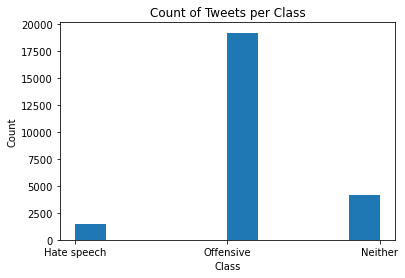

In [8]:
plt.hist(dataset['class'],align='mid')
col_names=['Hate speech','Offensive',"Neither"]
x_values = np.arange(0, len(col_names))
plt.xticks(x_values, col_names)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Tweets per Class')
plt.show()

## Visualization

In [7]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image

# optional: could use mask images

# import mask image
#mask = np.array(Image.open('comment.png'))

# set stopwords
sw = set(STOPWORDS)
sw.add("RT")

# offensive language wordcloud
wc_offensive = WordCloud(
    width = 500,
    height = 400,
    random_state = 3,
    collocations = False,
    background_color = 'white',
    colormap = 'rainbow',
    stopwords = sw,
    max_words = 200,
    max_font_size = 60,
    #mask = mask
).generate(str(dataset.loc[dataset["class"]==1].tweet))

plt.figure(figsize=(10,5))
plt.imshow(wc_offensive)
plt.axis("off")

(-0.5, 499.5, 399.5, -0.5)

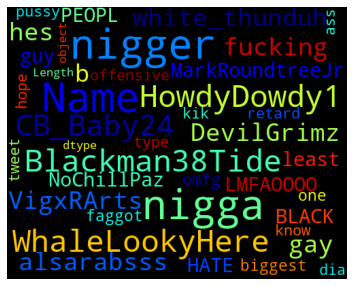

In [10]:
# hate speech wordcloud
wc_hate = WordCloud(
    width = 500,
    height = 400,
    random_state = 1,
    collocations = False,
    background_color = 'black',
    colormap = 'jet',
    stopwords = sw,
    max_words = 200,
    max_font_size = 60,
    #mask = mask
).generate(str(dataset.loc[dataset["class"]==0].tweet))

plt.figure(figsize=(10,5))
plt.imshow(wc_hate)
plt.axis("off")

(-0.5, 499.5, 399.5, -0.5)

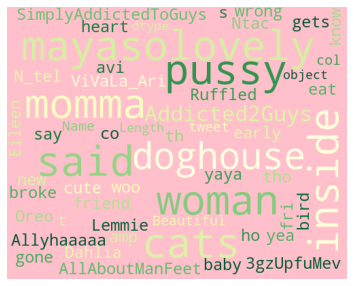

In [11]:
# neither wordcloud
wc_neither = WordCloud(
    width = 500,
    height = 400,
    random_state = 1,
    collocations = False,
    background_color = 'pink',
    colormap = 'YlGn',
    stopwords = sw,
    max_words = 200,
    max_font_size = 60,
    #mask = mask
).generate(str(dataset.loc[dataset["class"]==2].tweet))

plt.figure(figsize=(10,5))
plt.imshow(wc_neither)
plt.axis("off")

### Hashtags Analysis

In [9]:
# collect hashtags
def collect_hashtags(tweet):
    hts = []
    for i in tweet:
        ht = re.findall(r"#[a-zA-Z]+",i)
        hts.append(ht)
    return hts

In [10]:
# hashtags from different kinds of tweets
ht_off = collect_hashtags(dataset['tweet'][dataset['class']==1])
ht_hate = collect_hashtags(dataset['tweet'][dataset['class']==0])
ht_neither = collect_hashtags(dataset['tweet'][dataset['class']==2])

In [11]:
ht_off = sum(ht_off,[])
ht_hate = sum(ht_hate,[])
ht_neither = sum(ht_neither,[])

In [12]:
freq_off = nltk.FreqDist(ht_off)
df_off = pd.DataFrame(
    {
        'Hashtag':list(freq_off.keys()),
        'Number':list(freq_off.values())
    }
)

In [13]:
freq_hate = nltk.FreqDist(ht_hate)
df_hate = pd.DataFrame(
    {
        'Hashtag':list(freq_hate.keys()),
        'Number':list(freq_hate.values())
    }
)

In [14]:
freq_neither = nltk.FreqDist(ht_neither)
df_neither = pd.DataFrame(
    {
        'Hashtag':list(freq_neither.keys()),
        'Number':list(freq_neither.values())
    }
)

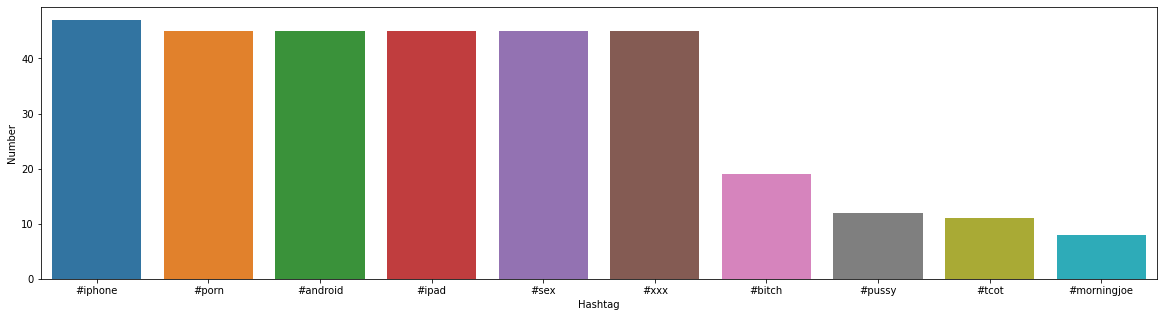

In [15]:
import seaborn as sns
# pick 10 most frequently used hashtags in each class
df_off = df_off.nlargest(columns="Number", n = 10)
plt.figure(figsize=(20,5))
ax = sns.barplot(data=df_off, x= "Hashtag", y = "Number")
plt.show()

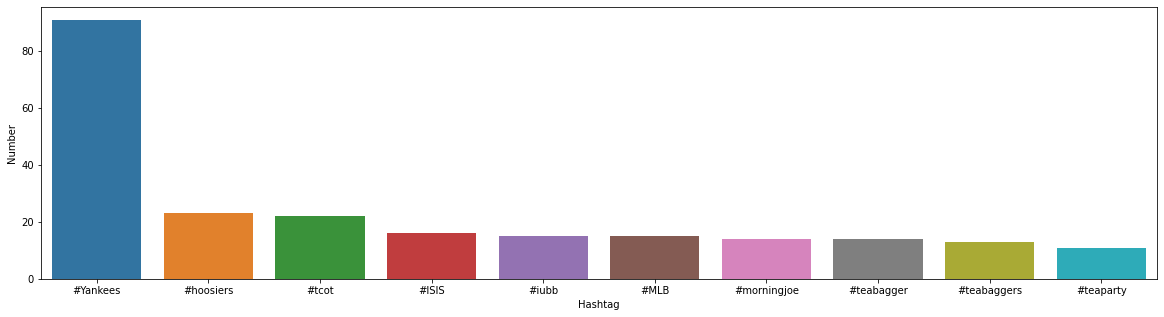

In [16]:
import seaborn as sns
df_neither = df_neither.nlargest(columns="Number", n = 10)
plt.figure(figsize=(20,5))
ax = sns.barplot(data=df_neither, x= "Hashtag", y = "Number")
plt.show()

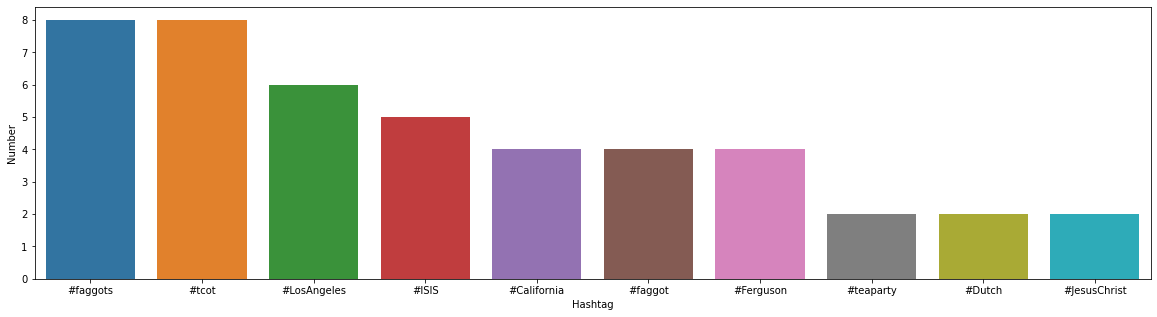

In [17]:
import seaborn as sns
df_hate = df_hate.nlargest(columns="Number", n = 10)
plt.figure(figsize=(20,5))
ax = sns.barplot(data=df_hate, x= "Hashtag", y = "Number")
plt.show()

We can see from the graphs that approximately only half of the terms clearly reflect the offensive, hate, or neither offensive nor hate languages. So perhaps hashtags should be removed in the following data cleaning step since they do not contain much useful information.

## Preprocess

In [18]:
# data cleaning
stemmer = nltk.PorterStemmer()
stopword = set(stopwords.words('english'))
new_tweet=[]
import string

def data_preprocess(review):
    review = re.sub(r'^\s+|\s+?$','',review) # remove leading and trailing whitespace
    review = re.sub(r'@[\w\-]+', '', review) # remove mentions
    review = re.sub(r'RT[\s]+', '', review) #remove retweet text 'RT'
    review = re.sub('[^a-zA-Z]',' ',review) #replace non-character with space
    review = review.lower() #lower the text
    review = re.sub('\[.*?\]', '', review)
    review = re.sub('https?://\S+|www\.\S+', '', review) # remove hyperlinks
    review = re.sub(r'#', '', review) # remove hashtags
    review = re.sub('[%s]' % re.escape(string.punctuation), '', review) # remove escape characters
    review = re.sub('\n', '', review)
    review = re.sub('\w*\d\w*', '', review)
    review = [word for word in review.split(' ') if word not in stopword and word not in string.punctuation] #remove stopwords and punctuations and tokenize
    review=" ".join(review)
    review = [stemmer.stem(word) for word in review.split(' ')] #use PorterStemmer
    
    review=" ".join(review)
    new_tweet.append(review)
    return review

In [19]:
dataset['processed_tweet'] = dataset['tweet'].apply(data_preprocess)

In [20]:
dataset[['tweet','processed_tweet']].head()

,tweet,processed_tweet
0,!!! RT @mayasolovely: As a woman you shouldn't...,woman complain clean hous amp man alway take t...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dat cold tyga dwn bad cuffin dat hoe st place
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg ever fuck bitch start cri confus shit
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,look like tranni
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shit hear might true might faker bitch told ya


In [21]:
dataset['processed_tweet'][0]

'woman complain clean hous amp man alway take trash'

In [22]:
dataset[dataset['class']==0]['processed_tweet']

85                                            queer gaywad
89                alsarabsss he beaner smh tell he mexican
110      fuck gay blacklist hoe hold tehgodclan anyway ...
184      lmfaoooo hate black peopl http co rnvd nlcdr b...
202                  least nigger http co rgja cfoit lmfao
                               ...                        
24576                              guy biggest faggot omfg
24685    one name offens kike wop kraut wetback jigaboo...
24751                           pussi ass nigga know nigga
24776                                               nigger
24777    retard hope get type diabet die sugar rush fuc...
Name: processed_tweet, Length: 1430, dtype: object

In [23]:
length=[]
for j in range(3):
    length.append([len(i.split()) for i in dataset[dataset['class']==j]['processed_tweet']])
mean_length = np.array([np.mean(i) for i in length])
var_length = np.array([np.var(i) for i in length])
max_length = np.array([np.max(i) for i in length])
min_length = np.array([np.min(i) for i in length])
cnt = np.array([len(i) for i in length])

words_description = pd.DataFrame([cnt, max_length,min_length,mean_length, var_length], 
                                 columns=['class_0','class_1','class_2'], index=['count','max','min','mean','variance'] )
words_description

,class_0,class_1,class_2
count,1430.000000,19190.000000,4163.000000
max,22.000000,27.000000,28.000000
min,1.000000,0.000000,0.000000
mean,7.862238,7.640021,8.972376
variance,17.914588,15.026121,18.238247


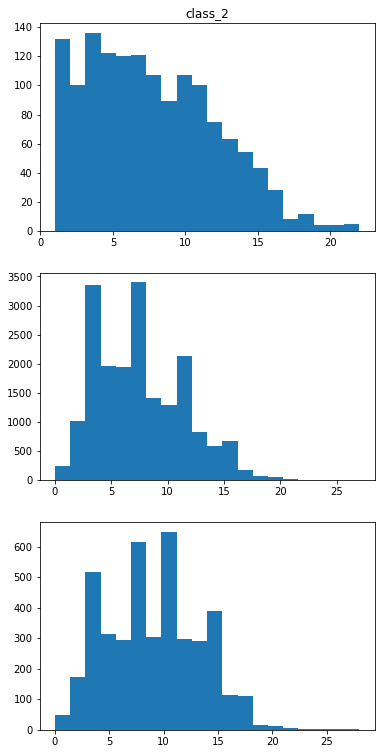

In [24]:
fig = plt.figure(figsize=(6,13))
ax1 = fig.add_subplot(311)
ax1.hist(length[0],bins=20)
ax1.set_title('class_0')
ax2 = fig.add_subplot(312)
ax2.hist(length[1],bins=20)
ax1.set_title('class_1')
ax3 = fig.add_subplot(313)
ax3.hist(length[2],bins=20)
ax1.set_title('class_2')
plt.show()

In [25]:
#Sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sentimentanalyzer
import nltk
nltk.download('vader_lexicon')

sentiment_analyzer = sentimentanalyzer()

def sentiment_analysis(tweet):   
    sentiment = sentiment_analyzer.polarity_scores(tweet)    
    features = [sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound']]
    return features

def sentiment_analysis_array(tweets):
    features=[]
    for t in tweets:
        features.append(sentiment_analysis(t))
    return np.array(features)

sentiment_features_0 = sentiment_analysis_array(dataset[dataset['class']==0]['processed_tweet'])
new_features_0 = pd.DataFrame({'Neg':sentiment_features_0[:,0],'Pos':sentiment_features_0[:,1],'Neu':sentiment_features_0[:,2],'Compound':sentiment_features_0[:,3]})

sentiment_features_1 = sentiment_analysis_array(dataset[dataset['class']==1]['processed_tweet'])
new_features_1 = pd.DataFrame({'Neg':sentiment_features_1[:,0],'Pos':sentiment_features_1[:,1],'Neu':sentiment_features_1[:,2],'Compound':sentiment_features_1[:,3]})

sentiment_features_2 = sentiment_analysis_array(dataset[dataset['class']==2]['processed_tweet'])
new_features_2 = pd.DataFrame({'Neg':sentiment_features_2[:,0],'Pos':sentiment_features_2[:,1],'Neu':sentiment_features_2[:,2],'Compound':sentiment_features_2[:,3]})

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anfang/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [26]:
new_features_0.mean(axis=0)

Neg         0.407173
Pos         0.095268
Neu         0.497562
Compound   -0.414240
dtype: float64

In [27]:
new_features_1.mean(axis=0)

Neg         0.366716
Pos         0.119675
Neu         0.513560
Compound   -0.348711
dtype: float64

In [28]:
new_features_2.mean(axis=0)

Neg         0.078400
Pos         0.137371
Neu         0.783992
Compound    0.076108
dtype: float64

## Visualization for Comparsion

(-0.5, 499.5, 399.5, -0.5)

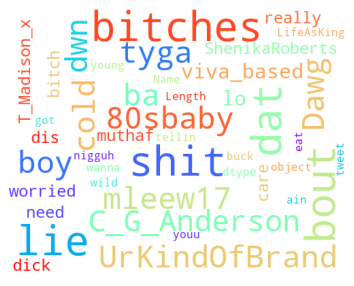

In [23]:
wc_offensive_new = WordCloud(
    width = 500,
    height = 400,
    random_state = 3,
    collocations = False,
    background_color = 'white',
    colormap = 'rainbow',
    stopwords = sw,
    max_words = 200,
    max_font_size = 60,
    #mask = mask
).generate(str(dataset.loc[dataset["class"]==1].tweet))

plt.figure(figsize=(10,5))
plt.imshow(wc_offensive_new)
plt.axis("off")

## Data Augmentation - by translating

### issues about google_trans
1) pip install google_trans_new <br>
2) then change the line 151 and Line 233 in google_trans_new/google_trans_new.py: <br>
response = (decoded_line + ']') <br>
to <br>
response = (decoded_line) # Note the Brackets shall be added <br>
3) if it cannot work on the terminal, change the line 8 in google_trans_new/google_trans_new.py: <br>
from .constant import LANGUAGES, DEFAULT_SERVICE_URLS <br>
to <br>
from constant import LANGUAGES, DEFAULT_SERVICE_URLS <br>

In [29]:
dataset.head()

,count,hate_speech,offensive_language,neither,class,tweet,processed_tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,woman complain clean hous amp man alway take t...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dat cold tyga dwn bad cuffin dat hoe st place
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg ever fuck bitch start cri confus shit
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,look like tranni
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shit hear might true might faker bitch told ya


In [31]:
# from textblob import TextBlob
# from textblob.translate import NotTranslated
import random
sr = random.SystemRandom()
# blob = TextBlob("Buongiorno!")
# print(blob.translate(to='en'))
# from googletrans import Translator
# translator = Translator()
# ar = translator.translate('مرحبا').text
# print(ar)
from google_trans_new import google_translator  
translator = google_translator()  
translate_text = translator.translate('สวัสดีจีน',lang_tgt='en')
print(translate_text)

Hello Chinese 


In [32]:
language = ["es", "de", "fr", "ar", "te", "hi", "ja", "fa", "sq", "bg", "nl", "gu", "ig", "kk", "mt", "ps"]

def data_augmentation(message, language, aug_range=1):
    augmented_messages = []
    if hasattr(message, "decode"):
        message = message.decode("utf-8")

    for j in range(0,aug_range) :
        try:
            trans_message = translator.translate(message, lang_tgt=sr.choice(language))
#         print(trans_message)
            new_message = translator.translate(trans_message, lang_tgt='en')
#         print(new_message)
#         text = TextBlob(message)
#         print(text)
#         try:
#             text = text.translate(to=sr.choice(language))   ## Converting to random langauge for meaningful variation
#             text = text.translate(to="en")
#         except NotTranslated:
#             pass
            augmented_messages.append(str(new_message))
        except:
            pass

    return augmented_messages

message = "@DomWorldPeace: Baseball season for the win. #Yankees This is where the love started"
data_augmentation(message, language, aug_range=1)

['@Domworldpeeace: baseball season for victory. #Yankees this is where love began ']

In [33]:
## Dictionary for intent count
## Intent is column name
intent_count = dataset['class'].value_counts().to_dict()
print(intent_count)
## Get max intent count to match other minority classes through data augmentation
import operator
max_intent_count = max(intent_count.items(), key=operator.itemgetter(1))[1]
print(max_intent_count)

{1: 19190, 2: 4163, 0: 1430}
19190


In [ ]:
## Loop to interate all messages
import math
import tqdm
newdf = pd.DataFrame()
for intent, count in intent_count.items() :
    count_diff = max_intent_count - count    ## Difference to fill
    print(count_diff)
    multiplication_count = math.ceil((count_diff)/count)  ## Multiplying a minority classes for multiplication_count times
    print(multiplication_count)
    if (multiplication_count) :
        old_message_df = pd.DataFrame()
        new_message_df = pd.DataFrame()
        for message in tqdm.tqdm(dataset[dataset["class"] == intent]["tweet"]) :
            ## Extracting existing minority class batch
            dummy1 = pd.DataFrame([message], columns=["tweet"])
            dummy1["class"] = intent
            old_message_df = old_message_df.append(dummy1)
            
            ## Creating new augmented batch from existing minority class
            try:
                new_messages = data_augmentation(message, language, multiplication_count)
                dummy2 = pd.DataFrame(new_messages, columns=['tweet'])
                dummy2["class"] = intent
                new_message_df = new_message_df.append(dummy2)
            except:
                continue
        
        ## Select random data points from augmented data
        new_message_df=new_message_df.take(np.random.permutation(len(new_message_df))[:count_diff])
        
        ## Merge existing and augmented data points
        newdf = newdf.append([old_message_df,new_message_df])
    else :
        newdf = newdf.append(dataset[dataset["class"] == intent])

0
0
15027
4


  2%|█▎                                                        | 92/4163 [12:58<9:38:16,  8.52s/it]

## Embedding

In [24]:
#from sklearn.feature_extraction.text import CountVectorizer    
#cv=CountVectorizer(max_features=3600)
#x=cv.fit_transform(corpus).toarray()
from sklearn.feature_extraction.text import CountVectorizer    
cv=CountVectorizer(max_features=3600)
cv_features=cv.fit_transform(new_tweet).toarray()

In [25]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(dataset['processed_tweet'])
tfidf_features = tfidf.toarray()

In [27]:
#Doc2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(dataset["processed_tweet"].apply(lambda x: x.split(" ")))]

# training of the model
doc2vec_model = Doc2Vec(documents,vector_size=5, window=2, min_count=1, workers=4)

# transform each document (tweet) into a vector data
doc2vec_features = dataset["processed_tweet"].apply(lambda x: doc2vec_model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_features.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_features.columns]

In [28]:
doc2vec_features

,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
0,-0.084718,-0.008398,-0.028714,0.039943,0.103436
1,-0.022219,0.054910,-0.218271,-0.090954,0.126600
2,0.037308,-0.042204,-0.106177,0.075950,0.097226
3,-0.072084,0.078954,-0.060723,0.057713,-0.037621
4,0.018358,0.017394,-0.172241,-0.088874,0.042690
...,...,...,...,...,...
24778,0.132220,-0.082962,-0.181043,-0.052418,0.181904
24779,-0.031428,-0.110710,0.006920,-0.082105,0.122945
24780,0.015196,-0.077183,-0.153628,0.089562,0.099719
24781,-0.000312,-0.000821,-0.028706,0.030879,0.049765


In [29]:
#sentiment analysis features
sa_features = pd.concat([new_features_0,new_features_1,new_features_2], ignore_index=True)
sa_features

,Neg,Pos,Neu,Compound
0,0.000,0.000,1.000,0.0000
1,0.277,0.000,0.723,-0.3182
2,0.280,0.000,0.720,-0.5423
3,0.471,0.000,0.529,-0.8402
4,0.000,0.581,0.419,0.7871
...,...,...,...,...
24778,0.000,0.333,0.667,0.4588
24779,0.000,0.776,0.224,0.9460
24780,0.000,0.000,1.000,0.0000
24781,0.496,0.000,0.504,-0.7096


In [30]:
total_features = np.concatenate([pd.DataFrame(cv_features),pd.DataFrame(tfidf_features),sa_features,doc2vec_features],axis=1)

In [31]:
total_features = pd.DataFrame(total_features)
total_features

,0,1,2,3,4,5,6,7,8,9,...,10186,10187,10188,10189,10190,10191,10192,10193,10194,10195
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,1.000,0.0000,-0.084718,-0.008398,-0.028714,0.039943,0.103436
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.277,0.000,0.723,-0.3182,-0.022219,0.054910,-0.218271,-0.090954,0.126600
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.280,0.000,0.720,-0.5423,0.037308,-0.042204,-0.106177,0.075950,0.097226
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.471,0.000,0.529,-0.8402,-0.072084,0.078954,-0.060723,0.057713,-0.037621
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.581,0.419,0.7871,0.018358,0.017394,-0.172241,-0.088874,0.042690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.333,0.667,0.4588,0.132220,-0.082962,-0.181043,-0.052418,0.181904
24779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.776,0.224,0.9460,-0.031428,-0.110710,0.006920,-0.082105,0.122945
24780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,1.000,0.0000,0.015196,-0.077183,-0.153628,0.089562,0.099719
24781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.496,0.000,0.504,-0.7096,-0.000312,-0.000821,-0.028706,0.030879,0.049765


## Train and Text Split

In [32]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(cv_features, y, test_size = 0.1, random_state=0)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=0)
X_train_sa, X_test_sa, y_train_sa, y_test_sa = train_test_split(sa_features, y, test_size = 0.1, random_state=0)
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_features, y, test_size = 0.1, random_state=0)
X_train_d2v, X_test_d2v, y_train_d2v, y_test_d2v = train_test_split(doc2vec_features, y, test_size = 0.1, random_state=0)
X_train_total, X_test_total, y_train_total, y_test_total = train_test_split(total_features, y, test_size = 0.1, random_state=0)

#X_train_cv.shape, X_test_cv.shape

## Classifiers

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

### Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
classifier_cv=DecisionTreeClassifier()
classifier_cv.fit(X_train_cv,y_train_cv)
pred_cv=classifier_cv.predict(X_test_cv)

Accuracy score: 0.8697055264219443
Precision score: 0.879436918918857
Recall score: 0.8697055264219443
f1 score: 0.8742111611017591


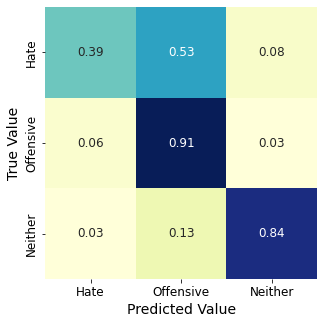

In [37]:
import seaborn

def result_evaluation(cm,y_test, pred):
    matrix_proportions = np.zeros((3,3))
    for i in range(0,3):
        matrix_proportions[i,:] = cm[i,:]/float(cm[i,:].sum())
    names=['Hate','Offensive','Neither']
    confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
    plt.figure(figsize=(5,5))
    seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
    plt.ylabel(r'True Value',fontsize=14)
    plt.xlabel(r'Predicted Value',fontsize=14)
    plt.tick_params(labelsize=12)
    print('Accuracy score: {}'.format(accuracy_score(y_test, pred)))
    print('Precision score: {}'.format(precision_score(y_test, pred,average='weighted')))
    print('Recall score: {}'.format(recall_score(y_test, pred,average='weighted')))
    print('f1 score: {}'.format(f1_score(y_test, pred,average='weighted')))

    
cm_cv=confusion_matrix(y_test_cv,pred_cv)
result_evaluation(cm_cv, y_test_cv, pred_cv)

In [38]:
classifier_sa=DecisionTreeClassifier()
classifier_sa.fit(X_train_sa,y_train_sa)
pred_sa=classifier_sa.predict(X_test_sa)

Accuracy score: 0.7208551835417507
Precision score: 0.6307335128978891
Recall score: 0.7208551835417507
f1 score: 0.6670620049895896


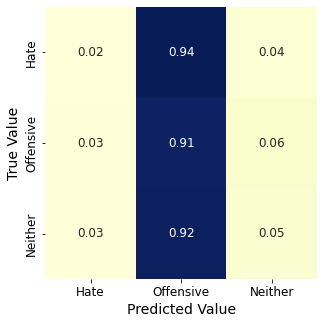

In [39]:
cm_sa=confusion_matrix(y_test_sa,pred_sa)
result_evaluation(cm_sa,y_test_sa, pred_sa)

In [40]:
classifier_tfidf=DecisionTreeClassifier()
classifier_tfidf.fit(X_train_tfidf,y_train_tfidf)
pred_tfidf=classifier_tfidf.predict(X_test_tfidf)

Accuracy score: 0.8805970149253731
Precision score: 0.8768559354255011
Recall score: 0.8805970149253731
f1 score: 0.87862109972136


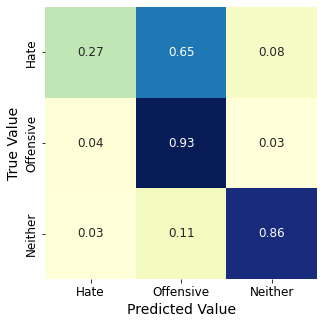

In [41]:
cm_tfidf=confusion_matrix(y_test_tfidf,pred_tfidf)
result_evaluation(cm_tfidf,y_test_tfidf, pred_tfidf)

In [42]:
classifier_d2v=DecisionTreeClassifier()
classifier_d2v.fit(X_train_d2v,y_train_d2v)
pred_d2v=classifier_d2v.predict(X_test_d2v)

Accuracy score: 0.6651875756353368
Precision score: 0.6574740802048379
Recall score: 0.6651875756353368
f1 score: 0.6612603836093345


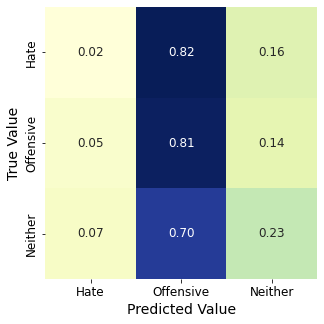

In [43]:
cm_d2v=confusion_matrix(y_test_d2v,pred_d2v)
result_evaluation(cm_d2v,y_test_d2v, pred_d2v)

In [44]:
classifier_total=DecisionTreeClassifier()
classifier_total.fit(X_train_total,y_train_total)
pred_total=classifier_total.predict(X_test_total)

Accuracy score: 0.8753529649052038
Precision score: 0.8730583194057517
Recall score: 0.8753529649052038
f1 score: 0.8741352225364418


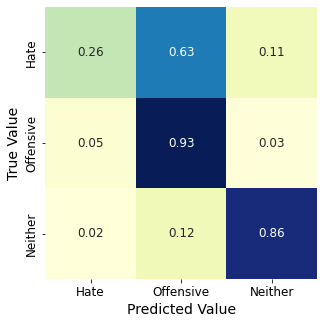

In [45]:
cm_total=confusion_matrix(y_test_total,pred_total)
result_evaluation(cm_total,y_test_total, pred_total)

### Logistic Regression

/Users/yingchenghan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score: 0.9019766034691408
Precision score: 0.8911056627276585
Recall score: 0.9019766034691408
f1 score: 0.8954564615270488


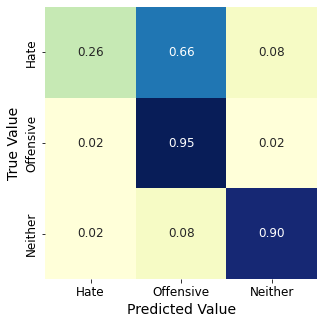

In [46]:
from sklearn.linear_model import LogisticRegression
classifier_cv=LogisticRegression()
classifier_cv.fit(X_train_cv,y_train_cv)
pred_cv=classifier_cv.predict(X_test_cv)
cm_cv=confusion_matrix(y_test_cv,pred_cv)
result_evaluation(cm_cv,y_test_cv, pred_cv)

Accuracy score: 0.7777329568374345
Precision score: 0.6048685521510987
Recall score: 0.7777329568374345
f1 score: 0.680494277641286


/Users/yingchenghan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


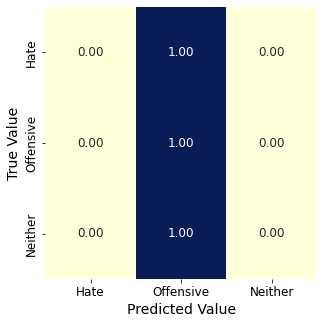

In [47]:
classifier_sa=LogisticRegression()
classifier_sa.fit(X_train_sa,y_train_sa)
pred_sa=classifier_sa.predict(X_test_sa)
cm_sa=confusion_matrix(y_test_sa,pred_sa)
result_evaluation(cm_sa,y_test_sa, pred_sa)

/Users/yingchenghan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score: 0.9015732150060508
Precision score: 0.8846180249575066
Recall score: 0.9015732150060508
f1 score: 0.8877251705276853


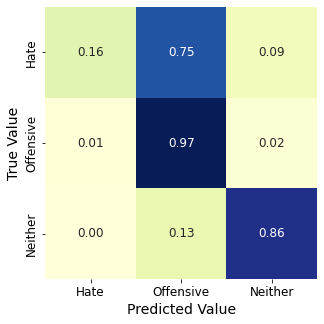

In [48]:
classifier_tfidf=LogisticRegression()
classifier_tfidf.fit(X_train_tfidf,y_train_tfidf)
pred_tfidf=classifier_tfidf.predict(X_test_tfidf)
cm_tfidf=confusion_matrix(y_test_tfidf,pred_tfidf)
result_evaluation(cm_tfidf,y_test_tfidf, pred_tfidf)

Accuracy score: 0.7805566760790641
Precision score: 0.6991891847206742
Recall score: 0.7805566760790641
f1 score: 0.7039932767875332


/Users/yingchenghan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


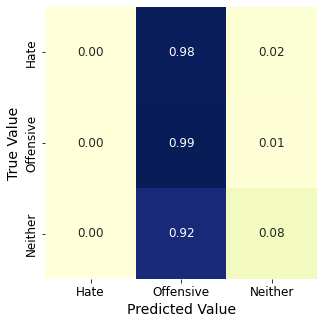

In [49]:
classifier_d2v=LogisticRegression()
classifier_d2v.fit(X_train_d2v,y_train_d2v)
pred_d2v=classifier_d2v.predict(X_test_d2v)
cm_d2v=confusion_matrix(y_test_d2v,pred_d2v)
result_evaluation(cm_d2v,y_test_d2v, pred_d2v)

/Users/yingchenghan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score: 0.899959661153691
Precision score: 0.8898178193656279
Recall score: 0.899959661153691
f1 score: 0.8939871210370989


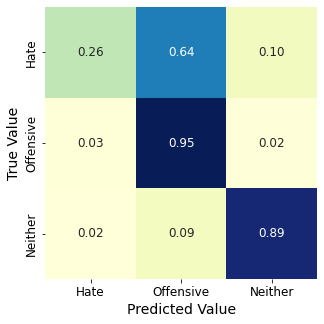

In [50]:
classifier_total=LogisticRegression()
classifier_total.fit(X_train_total,y_train_total)
pred_total=classifier_total.predict(X_test_total)
cm_total=confusion_matrix(y_test_d2v,pred_total)
result_evaluation(cm_total,y_test_total, pred_total)

### Naive Bayes

Accuracy score: 0.31665994352561516
Precision score: 0.7278403172001725
Recall score: 0.31665994352561516
f1 score: 0.36223898594204124


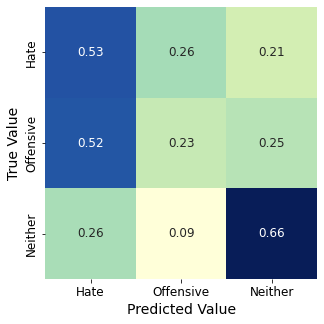

In [52]:
from sklearn.naive_bayes import GaussianNB
classifier_cv = GaussianNB()
classifier_cv.fit(X_train_cv,y_train_cv)
pred_cv=classifier_cv.predict(X_test_cv)
cm_cv=confusion_matrix(y_test_cv,pred_cv)
result_evaluation(cm_cv,y_test_cv, pred_cv)

Accuracy score: 0.7777329568374345
Precision score: 0.6048685521510987
Recall score: 0.7777329568374345
f1 score: 0.680494277641286


/Users/yingchenghan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


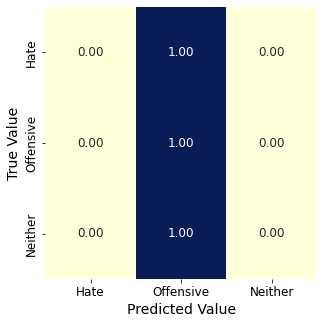

In [53]:
classifier_sa=GaussianNB()
classifier_sa.fit(X_train_sa,y_train_sa)
pred_sa=classifier_sa.predict(X_test_sa)
cm_sa=confusion_matrix(y_test_sa,pred_sa)
result_evaluation(cm_sa,y_test_sa, pred_sa)

Accuracy score: 0.6518757563533683
Precision score: 0.8107507514373313
Recall score: 0.6518757563533683
f1 score: 0.7112230618635512


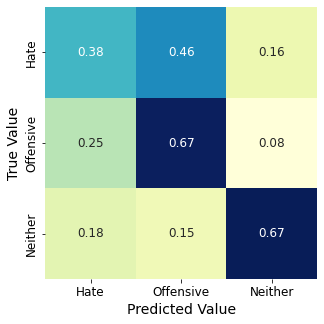

In [54]:
classifier_tfidf=GaussianNB()
classifier_tfidf.fit(X_train_tfidf,y_train_tfidf)
pred_tfidf=classifier_tfidf.predict(X_test_tfidf)
cm_tfidf=confusion_matrix(y_test_tfidf,pred_tfidf)
result_evaluation(cm_tfidf,y_test_tfidf, pred_tfidf)

Accuracy score: 0.7684550221863655
Precision score: 0.6942792660113529
Recall score: 0.7684550221863655
f1 score: 0.7233175838425452


/Users/yingchenghan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


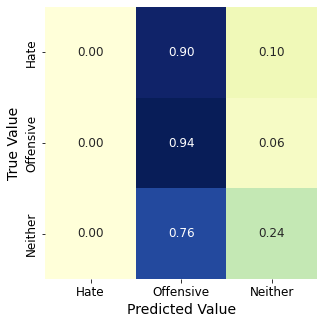

In [55]:
classifier_d2v=GaussianNB()
classifier_d2v.fit(X_train_d2v,y_train_d2v)
pred_d2v=classifier_d2v.predict(X_test_d2v)
cm_d2v=confusion_matrix(y_test_d2v,pred_d2v)
result_evaluation(cm_d2v,y_test_d2v, pred_d2v)

Accuracy score: 0.6518757563533683
Precision score: 0.8075504506009222
Recall score: 0.6518757563533683
f1 score: 0.7105510638086423


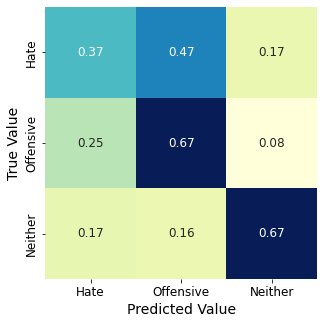

In [56]:
classifier_total=GaussianNB()
classifier_total.fit(X_train_total,y_train_total)
pred_total=classifier_total.predict(X_test_total)
cm_total=confusion_matrix(y_test_d2v,pred_total)
result_evaluation(cm_total,y_test_total, pred_total)

In [ ]:
from sklearn.svm import SVC 
classifier_cv = SVC(kernel='linear', C=1E10)
classifier_cv.fit(X_train_cv,y_train_cv)
y_pred_cv=classifier.predict(X_test_cv)
cm_cv=confusion_matrix(y_test_cv,pred_cv)
result_evaluation(cm_cv,y_test_cv, pred_cv)